<a href="https://colab.research.google.com/github/jiho-kang/Algorithm/blob/master/%EC%9D%B4%EC%BD%94%ED%85%8C/%EC%A0%95%EB%A0%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DFS & BFS

##DFS: 깊이 우선 탐색: 깊은 부분을 우선적으로 탐색하는 알고리즘
**스택 자료구조 | 재귀 | 이동할 때마다 가중치가 붙어서 이동 | 구역 나누기**
1. 탐색 시작 노드를 스택에 삽입하고 방문 처리
2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면 해당 노드를 스택에 넣고 방문 처리. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드 꺼내기
3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복

```python
### 예시 코드
graph = [
    [],
    [2,3,8], 
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]
visited = [False] * 9

def dfs(graph, v, visited):
  visited[v] = True
  print(v, end=' ')
  for i in graph[v]:
    if not visited[i]:
      dfs(graph, i, visited)
```




### 문제1
N * M 크기의 얼음 틀이 있다. 구멍이 뚫린 부분은 0, 칸막이는 1로 표시된다. 구멍이 뚫려있는 부분끼리 상,하,좌,우로 붙어 있는 경우 서로 연결되어 있는 것으로 간주한다.

얼음 틀의 모양이 주어졌을 때, 생성되는 아이스크림의 개수를 구하는 프로그램을 작성하시오.

예) 다음과 같이 4 X 5 틀에서 아이스크림은 총 3개 생성됩니다.
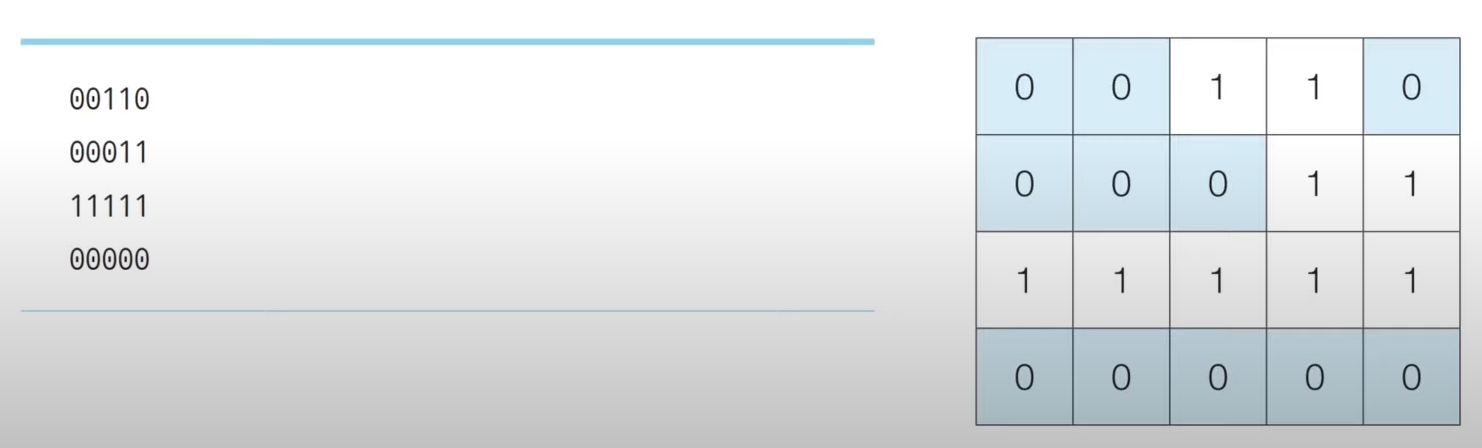

In [ ]:
'''
n, m = map(int, input().split())
graph = []
for i in range(n):
  graph.append(list(map(int, input())))
'''
n, m = 4, 5
graph = [
      [0,0,1,1,0],
      [0,0,0,1,1],
      [1,1,1,1,1],
      [0,0,0,0,0]]

def dfs(x, y):
  if 0<= x < n and 0 <= y < m:
    if graph[x][y] == 0:
      graph[x][y] = 1
      dfs(x, y-1)
      dfs(x, y+1)
      dfs(x-1, y)
      dfs(x+1, y)
      return True
    else:
      return False
  else:
    return False

result = 0
for i in range(n):
  for j in range(m):
    if dfs(i,j) == True:
      result +=1
print(result)


3


##BFS: 너비 우선 탐색: 가까운 노드부터 우선적으로 탐색.
**큐 자료구조 | 최단 거리 | 미로**

1. 탐색 시작 노드를 큐에 삽입하고 방문 처리
2. 큐에서 노드를 꺼낸 뒤 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리
3. 더이상 2번의 과정을 수행할 수 없을 때까지 반복

```python
#### 예시 코드
from collections import deque

graph = [
    [],
    [2,3,8], 
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]
visited = [False] * 9

def bfs(graph, start, visited):
    queue = deque([start])
    visited[start] = True

    while queue:
        v = queue.popleft()
        print(v, end=' ')

        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

bfs(graph, 1, visited)
```

### 문제2
N * M 크기의 직사각형 형태의 미로가 있다.

나의 위치는 (1,1)이며, 미로의 출구는 (N,M)이다. 한 번에 한 칸씩 이동할 수 있다. 괴물이 있으면 0, 없으면 1이다.

동빈이가 탈출하기 위해 움직여야 하는 최소 칸의 갯수를 구하세요.
칸을 셀 때는 시작칸과 마지막칸을 모두 포함해서 계산합니다. 

In [ ]:
from collections import deque
'''
n, m = map(int, input().split())
n += 1
graph = [[1]*m]
for i in range(n):
  graph.append(list(map(int, input())))
'''
n, m = 5, 6

graph = [
      [1,0,1,0,1,0],
      [1,1,1,1,1,1],
      [0,0,0,0,0,1],
      [1,1,1,1,1,1],
      [1,1,1,1,1,1]]

dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]



def bfs(x,y):
  q = deque()
  q.append((x,y))

  while q:
    x,y = q.popleft()
    for i in range(4):
      nx = x + dx[i]
      ny = y + dy[i]

      if nx < 0 or nx >= n or nx < 0 or ny >= n:
        continue
      if graph[nx][ny] == 0:
        continue
      
      if graph[nx][ny] == 1:
        graph[nx][ny] = graph[x][y] + 1
        q.append((nx, ny))
  return graph[n-1][m-1]

print(bfs(0,0))

6
